In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


#control Display of seaborn data
pd.options.display.max_columns=50
sns.set(style="darkgrid", rc={"axes.facecolor":"#CAF1DE"})

In [2]:
# load the uce dataset
#loading the dataset of uce results
df_UCE= pd.read_csv('UceResultsBySchool.csv')
df_UCE

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,% DIV 4,TOTAL DIV 7,% DIV 7,TOTAL DIV 9,% DIV 9,TOTAL X,% X,FEMALE CANDIDATES,FEMALE TOTAL DIV1,FEMALE % DIV1,FEMALE TOTAL DIV2,FEMALE % DIV2,FEMALE TOTAL DIV3,FEMALE % DIV3,FEMALE TOTAL DIV4,FEMALE % DIV4,FEMALE TOTAL DIV7,FEMALE % DIV7,FEMALE TOTAL DIV9,FEMALE % DIV9,FEMALE TOTAL X,FEMALE % X,MALE CANDIDATES,MALE TOTAL DIV1,MALE % DIV1,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL DIV7,MALE % DIV7,MALE TOTAL DIV9,MALE % DIV9,MALE TOTAL X,MALE % X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,176,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,151,NaN,99.3,150.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,153,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,113,107.0,94.7,6.0,5.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,109,NaN,100.0,109.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,73,NaN,97.3,71.0,2.7,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17634,2016,ZOMBO,PAIDHA SECONDARY SCHOOL P.O.BOX 117 PAIDHA,148.0,0.0,0.0,12.0,8.1,30.0,20.3,85.0,57.4,1.0,0.7,15.0,10.1,5.0,3.4,44,0.0,0.0,0.0,0.0,5.0,11.4,32.0,72.7,1.0,2.3,5.0,11.4,1.0,2.3,104,0.0,0.0,12.0,11.5,25.0,24.0,53.0,51.0,0.0,0.0,10.0,9.6,4.0,3.8
17635,2016,ZOMBO,PAKADHA SEED SECONDARY SCHOOL P.O.BOX 143 P...,68.0,0.0,0.0,2.0,2.9,11.0,16.2,50.0,73.5,0.0,0.0,5.0,7.4,0.0,0.0,28,0.0,0.0,1.0,3.6,4.0,14.3,21.0,75.0,0.0,0.0,2.0,7.1,0.0,0.0,40,0.0,0.0,1.0,2.5,7.0,17.5,29.0,72.5,0.0,0.0,3.0,7.5,0.0,0.0
17636,2016,ZOMBO,"CHARITY COLLEGE,PAIDHA P.O.BOX 47 PAIDHA",128.0,0.0,0.0,4.0,3.1,6.0,4.7,71.0,55.5,1.0,0.8,36.0,28.1,10.0,7.8,24,0.0,0.0,0.0,0.0,0.0,0.0,17.0,70.8,0.0,0.0,5.0,20.8,2.0,8.3,104,0.0,0.0,4.0,3.8,6.0,5.8,54.0,51.9,1.0,1.0,31.0,29.8,8.0,7.7
17637,2016,ZOMBO,NEGRINI MEM. SECONDARY SCHOOL P.O.BOX 156 P...,45.0,0.0,0.0,1.0,2.2,2.0,4.4,26.0,57.8,0.0,0.0,14.0,31.1,2.0,4.4,14,0.0,0.0,1.0,7.1,0.0,0.0,7.0,50.0,0.0,0.0,5.0,35.7,1.0,7.1,31,0.0,0.0,0.0,0.0,2.0,6.5,19.0,61.3,0.0,0.0,9.0,29.0,1.0,3.2


In [3]:
#Dataset before cleaning (screen shot of the first 20)
df_UCE.head(20)

,YEAR,DISTRICT,SCHOOL,TOTAL CANDIDATES,TOTAL DIV 1,% DIV 1,TOTAL DIV 2,% DIV 2,TOTAL DIV 3,% DIV 3,TOTAL DIV 4,% DIV 4,TOTAL DIV 7,% DIV 7,TOTAL DIV 9,% DIV 9,TOTAL X,% X,FEMALE CANDIDATES,FEMALE TOTAL DIV1,FEMALE % DIV1,FEMALE TOTAL DIV2,FEMALE % DIV2,FEMALE TOTAL DIV3,FEMALE % DIV3,FEMALE TOTAL DIV4,FEMALE % DIV4,FEMALE TOTAL DIV7,FEMALE % DIV7,FEMALE TOTAL DIV9,FEMALE % DIV9,FEMALE TOTAL X,FEMALE % X,MALE CANDIDATES,MALE TOTAL DIV1,MALE % DIV1,MALE TOTAL DIV2,MALE % DIV2,MALE TOTAL DIV3,MALE % DIV3,MALE TOTAL DIV4,MALE % DIV4,MALE TOTAL DIV7,MALE % DIV7,MALE TOTAL DIV9,MALE % DIV9,MALE TOTAL X,MALE % X
0,2011,WAKISO,GAYAZA HIGH SCHOOL,176.0,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,176,175.0,99.4,1.0,0.6,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
1,2011,MUKONO,NAMILYANGO COLLEGE,151.0,150.0,99.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.7,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,151,NaN,99.3,150.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
2,2011,MUKONO,"MT.ST.MARY'S,NAMAGUNGA",153.0,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,153,151.0,98.7,2.0,1.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
3,2011,WAKISO,"UGANDA MARTYRS SS,NAMUGONGO",222.0,216.0,97.3,6.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,113,107.0,94.7,6.0,5.3,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,109,NaN,100.0,109.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
4,2011,BUSHENYI MAIN,KITABI SEMINARY,73.0,71.0,97.3,2.0,2.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,73,NaN,97.3,71.0,2.7,2.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
5,2011,MASAKA MAIN,"ST.HENRY'S COLLEGE,KITOVU",164.0,159.0,97.0,5.0,3.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,164,NaN,97.0,159.0,3.0,5.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
6,2011,WAKISO,"KING'S COLLEGE,BUDO",218.0,210.0,96.3,7.0,3.2,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.5,74,73.0,98.6,1.0,1.4,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,144,NaN,95.1,137.0,4.2,6.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.7
7,2011,KIBAALE,"NOTRE DAME ACADEMY,BUSEESA",25.0,24.0,96.0,1.0,4.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,25,24.0,96.0,1.0,4.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
8,2011,KAMPALA,"ST.JOSEPH'S GIRLS,NSAMBYA",192.0,183.0,95.3,9.0,4.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,192,183.0,95.3,9.0,4.7,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0
9,2011,WAKISO,"ST.MARY'S SECONDARY SCHOOL,KITENDE",440.0,416.0,94.5,22.0,5.0,NaN,0.0,NaN,0.0,1.0,0.2,NaN,0.0,1.0,0.2,216,199.0,92.1,16.0,7.4,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,1.0,0.5,224,NaN,96.9,217.0,2.7,6.0,0.0,NaN,0.0,NaN,0.4,1.0,0.0,NaN,0.0


In [4]:
#checking shape for the data 
#Helps to determine number of rows and columns
df_UCE.shape

(17639, 48)

In [6]:
#Preparation and preprocessing or data cleaning
#checking the columns
df_UCE.columns

Index(['YEAR', 'DISTRICT ', 'SCHOOL', 'TOTAL CANDIDATES', 'TOTAL DIV 1',
       '% DIV 1', 'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3',
       'TOTAL DIV 4', '% DIV 4', 'TOTAL DIV 7', '% DIV 7', 'TOTAL DIV 9',
       '% DIV 9', 'TOTAL X', '% X', 'FEMALE CANDIDATES', 'FEMALE TOTAL DIV1 ',
       'FEMALE % DIV1 ', 'FEMALE TOTAL DIV2 ', 'FEMALE % DIV2',
       'FEMALE TOTAL DIV3', 'FEMALE % DIV3', 'FEMALE TOTAL DIV4',
       'FEMALE % DIV4', 'FEMALE TOTAL DIV7', 'FEMALE % DIV7',
       'FEMALE TOTAL DIV9', 'FEMALE % DIV9', 'FEMALE TOTAL X', 'FEMALE % X ',
       'MALE CANDIDATES', 'MALE TOTAL DIV1 ', 'MALE % DIV1 ',
       'MALE TOTAL DIV2 ', 'MALE % DIV2', 'MALE TOTAL DIV3', 'MALE % DIV3',
       'MALE TOTAL DIV4', 'MALE % DIV4 ', 'MALE TOTAL DIV7 ', 'MALE % DIV7',
       'MALE TOTAL DIV9 ', 'MALE % DIV9', 'MALE TOTAL X ', 'MALE % X'],
      dtype='object')


In [8]:
#Removing white spaces 
#columns like "District, Male total x, contain white spaces that ought to be removed"
df_UCE.columns = df_UCE.columns.to_series().apply(lambda x: x.strip())
df_UCE.columns

Index(['YEAR', 'DISTRICT', 'SCHOOL', 'TOTAL CANDIDATES', 'TOTAL DIV 1',
       '% DIV 1', 'TOTAL DIV 2', '% DIV 2', 'TOTAL DIV 3', '% DIV 3',
       'TOTAL DIV 4', '% DIV 4', 'TOTAL DIV 7', '% DIV 7', 'TOTAL DIV 9',
       '% DIV 9', 'TOTAL X', '% X', 'FEMALE CANDIDATES', 'FEMALE TOTAL DIV1',
       'FEMALE % DIV1', 'FEMALE TOTAL DIV2', 'FEMALE % DIV2',
       'FEMALE TOTAL DIV3', 'FEMALE % DIV3', 'FEMALE TOTAL DIV4',
       'FEMALE % DIV4', 'FEMALE TOTAL DIV7', 'FEMALE % DIV7',
       'FEMALE TOTAL DIV9', 'FEMALE % DIV9', 'FEMALE TOTAL X', 'FEMALE % X',
       'MALE CANDIDATES', 'MALE TOTAL DIV1', 'MALE % DIV1', 'MALE TOTAL DIV2',
       'MALE % DIV2', 'MALE TOTAL DIV3', 'MALE % DIV3', 'MALE TOTAL DIV4',
       'MALE % DIV4', 'MALE TOTAL DIV7', 'MALE % DIV7', 'MALE TOTAL DIV9',
       'MALE % DIV9', 'MALE TOTAL X', 'MALE % X'],
      dtype='object')

In [9]:
#use snake case for column names
df_UCE.columns = df_UCE.columns.str.replace(' ', '_')
df_UCE.columns 

Index(['YEAR', 'DISTRICT', 'SCHOOL', 'TOTAL_CANDIDATES', 'TOTAL_DIV_1',
       '%_DIV_1', 'TOTAL_DIV_2', '%_DIV_2', 'TOTAL_DIV_3', '%_DIV_3',
       'TOTAL_DIV_4', '%_DIV_4', 'TOTAL_DIV_7', '%_DIV_7', 'TOTAL_DIV_9',
       '%_DIV_9', 'TOTAL_X', '%_X', 'FEMALE_CANDIDATES', 'FEMALE_TOTAL_DIV1',
       'FEMALE_%_DIV1', 'FEMALE_TOTAL_DIV2', 'FEMALE_%_DIV2',
       'FEMALE_TOTAL_DIV3', 'FEMALE_%_DIV3', 'FEMALE_TOTAL_DIV4',
       'FEMALE_%_DIV4', 'FEMALE_TOTAL_DIV7', 'FEMALE_%_DIV7',
       'FEMALE_TOTAL_DIV9', 'FEMALE_%_DIV9', 'FEMALE_TOTAL_X', 'FEMALE_%_X',
       'MALE_CANDIDATES', 'MALE_TOTAL_DIV1', 'MALE_%_DIV1', 'MALE_TOTAL_DIV2',
       'MALE_%_DIV2', 'MALE_TOTAL_DIV3', 'MALE_%_DIV3', 'MALE_TOTAL_DIV4',
       'MALE_%_DIV4', 'MALE_TOTAL_DIV7', 'MALE_%_DIV7', 'MALE_TOTAL_DIV9',
       'MALE_%_DIV9', 'MALE_TOTAL_X', 'MALE_%_X'],
      dtype='object')

In [11]:
#checking for information of the dataset about the data types
df_UCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17639 entries, 0 to 17638
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   YEAR               17639 non-null  int64  
 1   DISTRICT           17639 non-null  object 
 2   SCHOOL             17638 non-null  object 
 3   TOTAL_CANDIDATES   17368 non-null  float64
 4   TOTAL_DIV_1        12858 non-null  float64
 5   %_DIV_1            17639 non-null  float64
 6   TOTAL_DIV_2        16880 non-null  float64
 7   %_DIV_2            17639 non-null  float64
 8   TOTAL_DIV_3        17168 non-null  float64
 9   %_DIV_3            17639 non-null  float64
 10  TOTAL_DIV_4        16888 non-null  float64
 11  %_DIV_4            17639 non-null  float64
 12  TOTAL_DIV_7        6489 non-null   float64
 13  %_DIV_7            17639 non-null  float64
 14  TOTAL_DIV_9        13454 non-null  float64
 15  %_DIV_9            17639 non-null  float64
 16  TOTAL_X            134

In [13]:
#check if there are any duplicates and drop them

for isduplicate in df_UCE.duplicated():
    if isduplicate:
        print("Duplicate identified and dropped")
        df_UCE.drop_duplicates(inplace=True)
        break

    else:
        pass
print("No duplicates found")

df_UCE[df_UCE.duplicated()==True] 


No duplicates found


,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,TOTAL_DIV_4,%_DIV_4,TOTAL_DIV_7,%_DIV_7,TOTAL_DIV_9,%_DIV_9,TOTAL_X,%_X,FEMALE_CANDIDATES,FEMALE_TOTAL_DIV1,FEMALE_%_DIV1,FEMALE_TOTAL_DIV2,FEMALE_%_DIV2,FEMALE_TOTAL_DIV3,FEMALE_%_DIV3,FEMALE_TOTAL_DIV4,FEMALE_%_DIV4,FEMALE_TOTAL_DIV7,FEMALE_%_DIV7,FEMALE_TOTAL_DIV9,FEMALE_%_DIV9,FEMALE_TOTAL_X,FEMALE_%_X,MALE_CANDIDATES,MALE_TOTAL_DIV1,MALE_%_DIV1,MALE_TOTAL_DIV2,MALE_%_DIV2,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X


In [14]:
#check for null values and NaN values in the dataset
df_UCE.isna().any()

YEAR                 False
DISTRICT             False
SCHOOL                True
TOTAL_CANDIDATES      True
TOTAL_DIV_1           True
%_DIV_1              False
TOTAL_DIV_2           True
%_DIV_2              False
TOTAL_DIV_3           True
%_DIV_3              False
TOTAL_DIV_4           True
%_DIV_4              False
TOTAL_DIV_7           True
%_DIV_7              False
TOTAL_DIV_9           True
%_DIV_9              False
TOTAL_X               True
%_X                  False
FEMALE_CANDIDATES    False
FEMALE_TOTAL_DIV1     True
FEMALE_%_DIV1         True
FEMALE_TOTAL_DIV2     True
FEMALE_%_DIV2         True
FEMALE_TOTAL_DIV3     True
FEMALE_%_DIV3         True
FEMALE_TOTAL_DIV4     True
FEMALE_%_DIV4         True
FEMALE_TOTAL_DIV7     True
FEMALE_%_DIV7         True
FEMALE_TOTAL_DIV9     True
FEMALE_%_DIV9         True
FEMALE_TOTAL_X        True
FEMALE_%_X            True
MALE_CANDIDATES      False
MALE_TOTAL_DIV1       True
MALE_%_DIV1           True
MALE_TOTAL_DIV2       True
M

In [15]:
#number of rows that have null values
null_rows = df_UCE[df_UCE.isna().any(axis=1)]
before_computation =len(null_rows.axes[0])

print("number of rows that are null: ", before_computation)

number of rows that are null:  14511


In [16]:
#checking the total of null values in ascending order
df_UCE.isnull().sum().sort_values(ascending = False)

FEMALE_TOTAL_DIV7    12875
TOTAL_DIV_7          11150
MALE_TOTAL_DIV7      10131
FEMALE_TOTAL_DIV1     9114
MALE_TOTAL_DIV1       7601
MALE_TOTAL_X          7260
MALE_TOTAL_DIV9       7120
FEMALE_TOTAL_X        7043
FEMALE_TOTAL_DIV9     5290
TOTAL_DIV_1           4781
TOTAL_X               4235
TOTAL_DIV_9           4185
FEMALE_TOTAL_DIV2     3307
MALE_TOTAL_DIV2       2397
MALE_TOTAL_DIV4       1379
MALE_TOTAL_DIV3       1240
FEMALE_TOTAL_DIV3     1165
FEMALE_TOTAL_DIV4      958
TOTAL_DIV_2            759
TOTAL_DIV_4            751
TOTAL_DIV_3            471
TOTAL_CANDIDATES       271
MALE_%_DIV4            134
MALE_%_DIV3            134
MALE_%_DIV7            134
MALE_%_DIV2            134
MALE_%_DIV1            134
MALE_%_DIV9            134
MALE_%_X               134
FEMALE_%_X              58
FEMALE_%_DIV3           58
FEMALE_%_DIV9           58
FEMALE_%_DIV4           58
FEMALE_%_DIV2           58
FEMALE_%_DIV1           58
FEMALE_%_DIV7           58
SCHOOL                   1
%

In [17]:
#check null interms of percentages
for i in df_UCE.columns:
    if df_UCE[i].isnull().any():
        print(i, "----------", df_UCE[i].isnull().sum()*100/df_UCE.shape[0], "%") 

SCHOOL ---------- 0.00566925562673621 %
TOTAL_CANDIDATES ---------- 1.5363682748455127 %
TOTAL_DIV_1 ---------- 27.104711151425818 %
TOTAL_DIV_2 ---------- 4.302965020692783 %
TOTAL_DIV_3 ---------- 2.670219400192755 %
TOTAL_DIV_4 ---------- 4.257610975678894 %
TOTAL_DIV_7 ---------- 63.212200238108736 %
TOTAL_DIV_9 ---------- 23.725834797891036 %
TOTAL_X ---------- 24.009297579227848 %
FEMALE_TOTAL_DIV1 ---------- 51.66959578207381 %
FEMALE_%_DIV1 ---------- 0.32881682635070014 %
FEMALE_TOTAL_DIV2 ---------- 18.748228357616647 %
FEMALE_%_DIV2 ---------- 0.32881682635070014 %
FEMALE_TOTAL_DIV3 ---------- 6.604682805147684 %
FEMALE_%_DIV3 ---------- 0.32881682635070014 %
FEMALE_TOTAL_DIV4 ---------- 5.431146890413289 %
FEMALE_%_DIV4 ---------- 0.32881682635070014 %
FEMALE_TOTAL_DIV7 ---------- 72.9916661942287 %
FEMALE_%_DIV7 ---------- 0.32881682635070014 %
FEMALE_TOTAL_DIV9 ---------- 29.99036226543455 %
FEMALE_%_DIV9 ---------- 0.32881682635070014 %
FEMALE_TOTAL_X ---------- 39.92856

<AxesSubplot:>

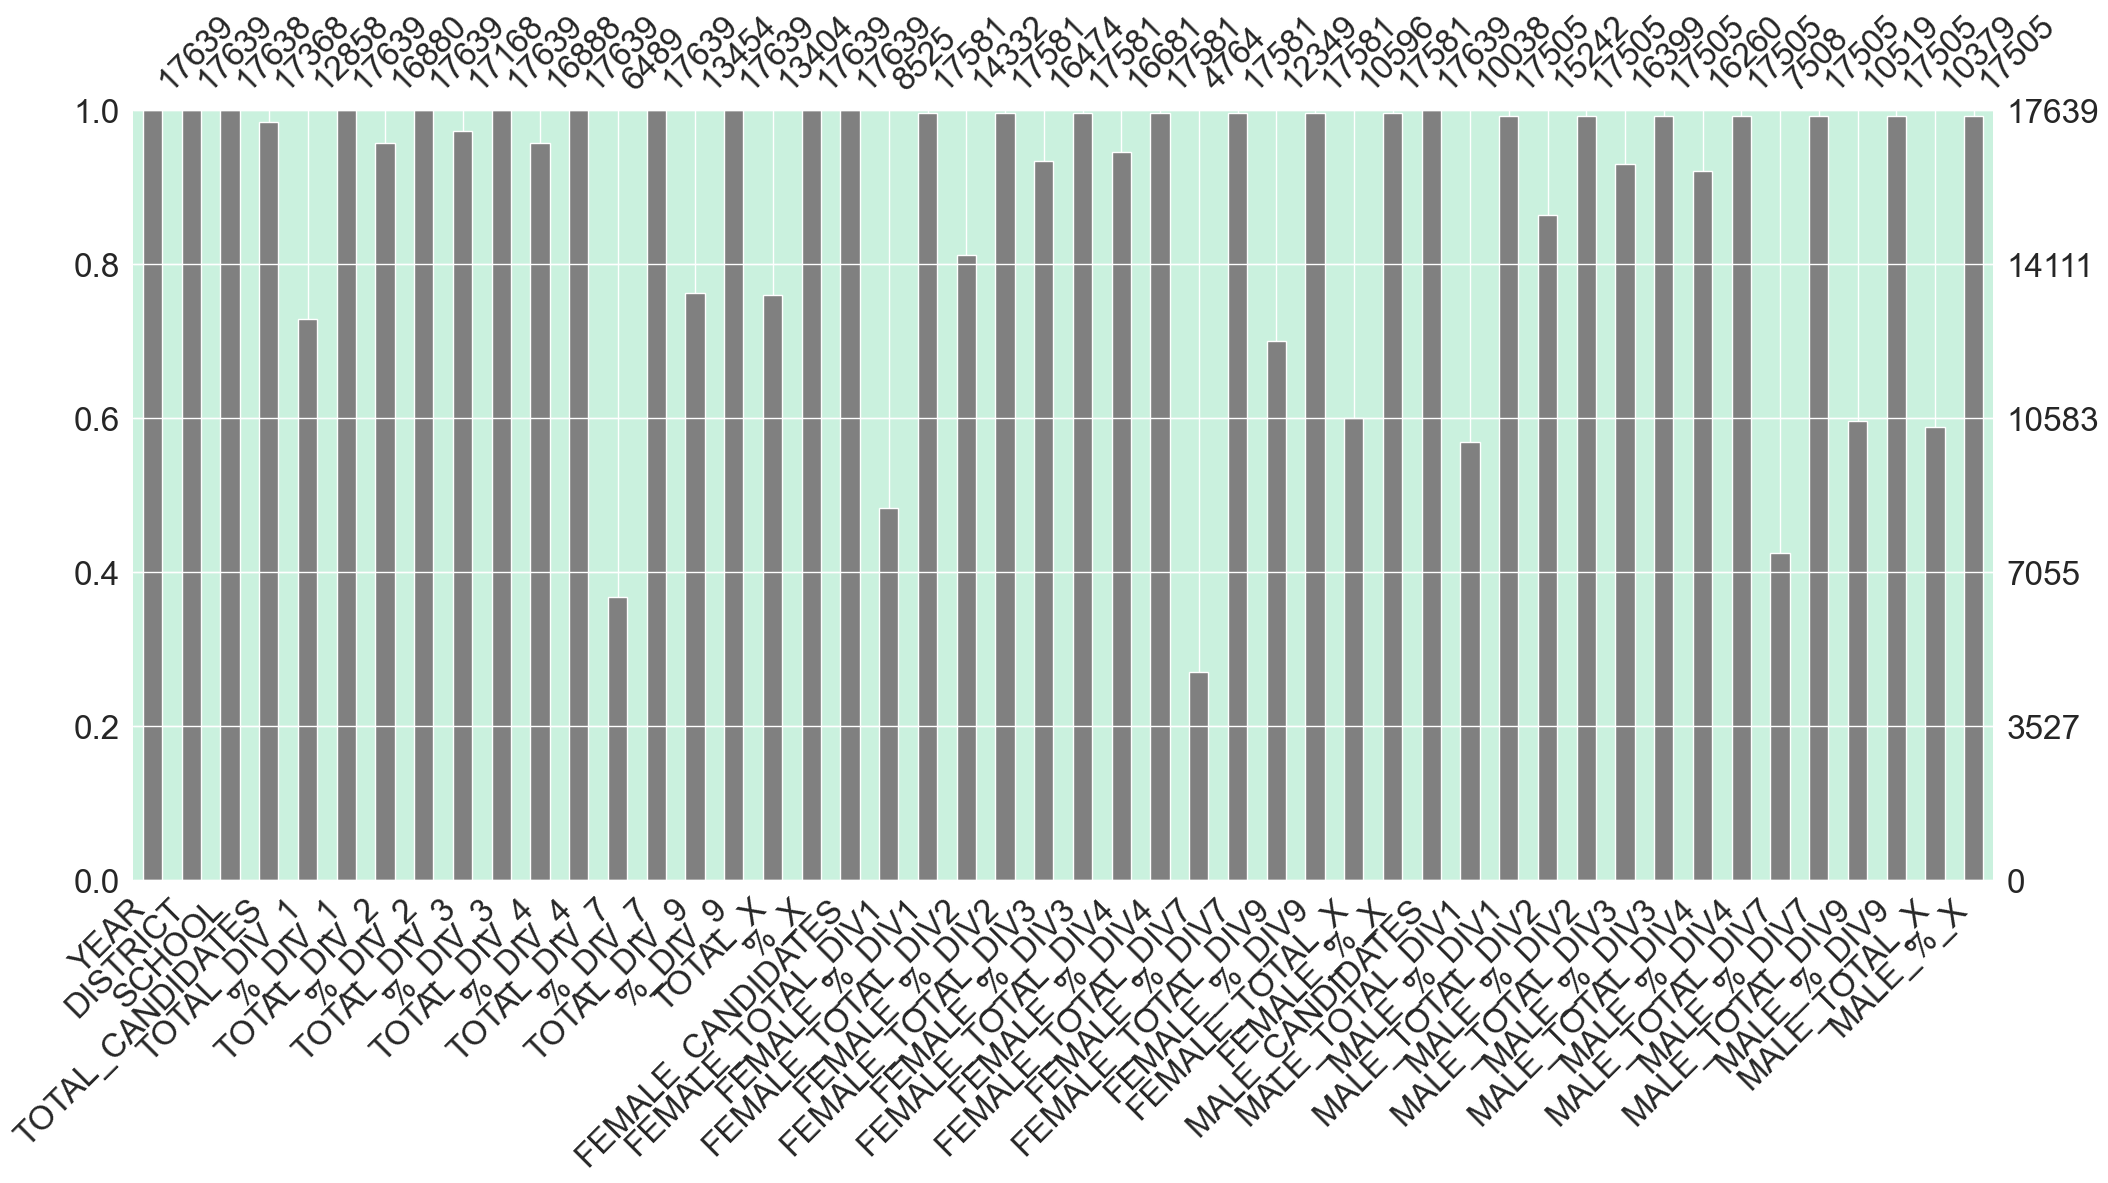

In [18]:
#check for the values in figure
msno.bar(df_UCE, color = "gray", fontsize=24)

In [30]:
#checking for the rows that are null values
withnullrows = df_UCE[df_UCE.isna().any(axis=1)]
before_computation = len(withnullrows.axes[0])

print("Number of rows with null values:" +str(before_computation))

Number of rows with null values:14511


In [19]:
#remove rows without school names since it cannot be identified

df_UCE.dropna(thresh =None, subset =['SCHOOL'], inplace = True)

In [20]:
#replace missing total candidates with with some of male and female candidates since non of the two has missing values
df_UCE["TOTAL_CANDIDATES"].fillna(df_UCE["MALE_CANDIDATES"]+ df_UCE["FEMALE_CANDIDATES"], inplace = True)

In [21]:
#check if total number of the sum of total male and female is equal to total candidates
notEqual = df_UCE[df_UCE["TOTAL_CANDIDATES"]!= (df_UCE["MALE_CANDIDATES"]+df_UCE["FEMALE_CANDIDATES"])]
notEqual[["SCHOOL", "TOTAL_CANDIDATES", "MALE_CANDIDATES", "FEMALE_CANDIDATES"]]

,SCHOOL,TOTAL_CANDIDATES,MALE_CANDIDATES,FEMALE_CANDIDATES
380,NTINDA VIEW COLLEGE,105.0,63,41
738,"FAIHA HIGH SCHOOL,KAWEMPE",212.0,108,102
787,"CONCERTED COLLEGE SCHOOL,NTINDA",38.0,18,19
824,"ST.FRANCIS VOCATIONAL SS,BITOOMA",100.0,46,53
987,SAYIDINA ABUBAKAR SECONDARY SCHOOL,107.0,54,51
1441,"GOLDEN SCHOOL,KAMPALA",55.0,26,27
2133,"CARDINAL E.WAMALA VOCATIONAL SS,BULO",50.0,24,25
2191,HIGHWAY INTEGRATED SECONDARY SCHOOL,135.0,71,63
2585,"ST.MARY'S SECONDARY SCHOOL,KYOGA",39.0,16,22


Cleaning the notequals row  in total candidates

In [22]:
for row in notEqual.index:
    df_UCE.at[row, 'TOTAL_CANDIDATES'] = df_UCE.at[row, 'MALE_CANDIDATES']+ df_UCE.at[row, 'FEMALE_CANDIDATES']

Verification for total candidates equal to sum

In [23]:
df_UCE[df_UCE["TOTAL_CANDIDATES"]!= (df_UCE["MALE_CANDIDATES"]+df_UCE["FEMALE_CANDIDATES"])]

,YEAR,DISTRICT,SCHOOL,TOTAL_CANDIDATES,TOTAL_DIV_1,%_DIV_1,TOTAL_DIV_2,%_DIV_2,TOTAL_DIV_3,%_DIV_3,TOTAL_DIV_4,%_DIV_4,TOTAL_DIV_7,%_DIV_7,TOTAL_DIV_9,%_DIV_9,TOTAL_X,%_X,FEMALE_CANDIDATES,FEMALE_TOTAL_DIV1,FEMALE_%_DIV1,FEMALE_TOTAL_DIV2,FEMALE_%_DIV2,FEMALE_TOTAL_DIV3,FEMALE_%_DIV3,FEMALE_TOTAL_DIV4,FEMALE_%_DIV4,FEMALE_TOTAL_DIV7,FEMALE_%_DIV7,FEMALE_TOTAL_DIV9,FEMALE_%_DIV9,FEMALE_TOTAL_X,FEMALE_%_X,MALE_CANDIDATES,MALE_TOTAL_DIV1,MALE_%_DIV1,MALE_TOTAL_DIV2,MALE_%_DIV2,MALE_TOTAL_DIV3,MALE_%_DIV3,MALE_TOTAL_DIV4,MALE_%_DIV4,MALE_TOTAL_DIV7,MALE_%_DIV7,MALE_TOTAL_DIV9,MALE_%_DIV9,MALE_TOTAL_X,MALE_%_X


Set total candidaes to int

In [24]:
#before setting it
df_UCE["TOTAL_CANDIDATES"].dtypes

dtype('float64')

In [25]:
#After setting it
df_UCE["TOTAL_CANDIDATES"] = df_UCE["TOTAL_CANDIDATES"].astype("int")
df_UCE["TOTAL_CANDIDATES"].dtypes

dtype('int32')

## COMPUTATIONAL LOGIC BASED ON MATHEMATICAL ARITHMETICS TO DEAL WITH NaN VALUES IN THE DATA SET

Note: No assumptions made in the cleaning logic

In [26]:
#generating grades array [1,2,3,7,9,x] from each % grade
grades = []
for column in df_UCE.columns:
    if(column.startswith("%")):
        grades.append(column[-1])

#Getting coefficients of key Sections
for row in df_UCE.index:
    total_Coefficients = df_UCE.at[row, "TOTAL_CANDIDATES"]/100
    male_Coefficients = df_UCE.at[row, "MALE_CANDIDATES"]/100
    female_Coefficients = df_UCE.at[row, "FEMALE_CANDIDATES"]/100

    #for each grade [1,2,3,7,9,x] obtain its total, %, maletotal, femaletotal,female%
    for grade in grades:
        total = list(filter(lambda x:x.endswith(grade)and x.startswith("TOTAL"),df_UCE.columns))[0]
        totalPercentage = list(filter(lambda x:x.endswith(grade)and x.startswith("%"),df_UCE.columns))[0]
        maleTotal = list(filter(lambda x:x.endswith(grade)and x.startswith("MALE") and "TOTAL",df_UCE.columns))[0]
        malePercentage = list(filter(lambda x:x.endswith(grade)and x.startswith("MALE") and "%",df_UCE.columns))[0]
        femaleTotal = list(filter(lambda x:x.endswith(grade)and x.startswith("FEMALE") and "TOTAL",df_UCE.columns))[0]
        femalePercentage = list(filter(lambda x:x.endswith(grade)and x.startswith("FEMALE") and "%",df_UCE.columns))[0]

    #here whenever the coefficients are 0, fill the remmaining related fileds for that grade with 0s
    if(total_Coefficients ==0.0):
        df_UCE.at[row,total]= 0.0
        df_UCE.at[row,totalPercentage]= 0.0
    if(male_Coefficients ==0.0):
        df_UCE.at[row,maleTotal]= 0.0
        df_UCE.at[row,malePercentage]= 0.0
    if(female_Coefficients ==0.0):
        df_UCE.at[row,femaleTotal]= 0.0
        df_UCE.at[row,femalePercentage]= 0.0

    #whenever the percentage grade 0.0% replace its coresponding NaN with 0.0
    if(df_UCE.at[row,totalPercentage]== 0.0 and pd.isna(df_UCE.at[row, total])):
        df_UCE.at[row,total] = 0.0
    if(df_UCE.at[row,femalePercentage]== 0.0 and pd.isna(df_UCE.at[row, femaleTotal])):
        df_UCE.at[row,femaleTotal] = 0.0
    if(df_UCE.at[row,malePercentage]== 0.0 and pd.isna(df_UCE.at[row, maleTotal])):
        df_UCE.at[row,maleTotal] = 0.0

    #whenever the grade 0.0 replace its corresponding NaN %grade with 0.0
    if(df_UCE.at[row,total]== 0.0 and pd.isna(df_UCE.at[row, totalPercentage])):
        df_UCE.at[row,totalPercentage] =0.0
    if(df_UCE.at[row,femaleTotal]== 0.0 and pd.isna(df_UCE.at[row, femalePercentage])):
        df_UCE.at[row,femalePercentage] =0.0
    if(df_UCE.at[row,maleTotal]== 0.0 and pd.isna(df_UCE.at[row, malePercentage])):
        df_UCE.at[row,malePercentage] =0.0

    #using calculated cooeficients
    if(pd.notna(df_UCE.at[row,total]) and pd.isna(df_UCE.at[row,totalPercentage])):
        df_UCE.at[row,totalPercentage] = round(df_UCE.at[row,total]/ total_Coefficients,1)

    if(pd.notna(df_UCE.at[row,totalPercentage]) and pd.isna(df_UCE.at[row,total])):
        df_UCE.at[row,total] = int(total_Coefficients* df_UCE.at[row,totalPercentage])

    if(pd.notna(df_UCE.at[row,maleTotal]) and pd.isna(df_UCE.at[row,malePercentage])):
        df_UCE.at[row,totalPercentage] = round(df_UCE.at[row,maleTotal]/ male_Coefficients,1)

    if(pd.notna(df_UCE.at[row,malePercentage]) and pd.isna(df_UCE.at[row,maleTotal])):
        df_UCE.at[row,total] = int(male_Coefficients* df_UCE.at[row,malePercentage])

    if(pd.notna(df_UCE.at[row,femaleTotal]) and pd.isna(df_UCE.at[row,femalePercentage])):
        df_UCE.at[row,femalePercentage] = round(df_UCE.at[row,femaleTotal]/ female_Coefficients,1)

    if(pd.notna(df_UCE.at[row,femalePercentage]) and pd.isna(df_UCE.at[row,femaleTotal])):
        df_UCE.at[row,femaleTotal] = int(female_Coefficients* df_UCE.at[row,femalePercentage])

    #applying subtraction from  total% to female the missing ones  i.e male and female percentages
    if(pd.notna(df_UCE.at[row,malePercentage]) and pd.isna(df_UCE.at[row,femaleTotal])) is not (pd.notna(df_UCE.at[row,femalePercentage]) == pd.isna(df_UCE.at[row,malePercentage])):
        if(pd.notna(df_UCE.at[row,malePercentage])):
            df_UCE.at[row,femalePercentage] = df_UCE.at[row,totalPercentage] - df_UCE.at[row,malePercentage]

        if(pd.notna(df_UCE.at[row,femalePercentage])):
            df_UCE.at[row,malePercentage] = df_UCE.at[row,totalPercentage] - df_UCE.at[row,femalePercentage]

    #get total missing grades by summation and subtraction
    if not (pd.notna(df_UCE.at[row,total]) and pd.notna(df_UCE.at[row,maleTotal]) and pd.notna(df_UCE.at[row,femaleTotal])):
        if (pd.notna(df_UCE.at[row,total]) and pd.notna(df_UCE.at[row,maleTotal])):
            df_UCE.at[row,femaleTotal] = df_UCE.at[row,total] - df_UCE.at[row,maleTotal]
        if (pd.notna(df_UCE.at[row,total]) and pd.notna(df_UCE.at[row,femaleTotal])):
            df_UCE.at[row,maleTotal] = df_UCE.at[row,total] - df_UCE.at[row,femaleTotal]
        if (pd.notna(df_UCE.at[row,maleTotal]) and pd.notna(df_UCE.at[row,femaleTotal])):
            df_UCE.at[row,total] = df_UCE.at[row,femaleTotal] + df_UCE.at[row,maleTotal]


        

Number of rows with null values after running the algorithm.

In [27]:
print("Number of rows with null values before running the algorithm:" +str(before_computation))
with_null_values_after = df_UCE[df_UCE.isna().any(axis=1)]
print("Number of rows with null values after running the algorithm:" +str(len(with_null_values_after.axes[0])))


Number of rows with null values before running the algorithm:14511
Number of rows with null values after running the algorithm:14485


Dataframe after running algorithm

In [40]:
df_UCE.isna().any()

YEAR                 False
DISTRICT             False
SCHOOL               False
TOTAL_CANDIDATES     False
TOTAL_DIV_1          False
%_DIV_1              False
TOTAL_DIV_2          False
%_DIV_2              False
TOTAL_DIV_3          False
%_DIV_3              False
TOTAL_DIV_4          False
%_DIV_4              False
TOTAL_DIV_7          False
%_DIV_7              False
TOTAL_DIV_9          False
%_DIV_9              False
TOTAL_X              False
%_X                  False
FEMALE_CANDIDATES    False
FEMALE_TOTAL_DIV1    False
FEMALE_%_DIV1        False
FEMALE_TOTAL_DIV2    False
FEMALE_%_DIV2        False
FEMALE_TOTAL_DIV3    False
FEMALE_%_DIV3        False
FEMALE_TOTAL_DIV4    False
FEMALE_%_DIV4        False
FEMALE_TOTAL_DIV7    False
FEMALE_%_DIV7        False
FEMALE_TOTAL_DIV9    False
FEMALE_%_DIV9        False
FEMALE_TOTAL_X       False
FEMALE_%_X           False
MALE_CANDIDATES      False
MALE_TOTAL_DIV1      False
MALE_%_DIV1          False
MALE_TOTAL_DIV2      False
M

Contain redundant data of some school address on it and its short form

In [43]:
#schools before cleaning wrong format
for school in sorted(df_UCE.SCHOOL.unique()):
    print(school)

Schools after cleaning

In [44]:
df_UCE.SCHOOL = df_UCE.SCHOOL.apply(lambda x: x.split(" ") [0].strip())

df_UCE.SCHOOL. replace({r'SCHI\.': "SCHOOL", r'SCHI\b': "SCHOOL", r'THEO\. ': "THEOLOGICAL", r'COMMI\.': "COMMUNITY",
                        r'SS\b':" SEgONDARY SCHOOL", r'MEMI\. ': "MEMORIAL", r'SECI\.': "SECONDARY", r'SECONDRY\b': "SECONDARY",
                        r'H/S\b': "HIGH SCHOOL", r'SEMI\. ': "SEMINARY", r'COMPI\. ' : "COMPREHESIVE", r'SEN\. ' : "SENIOR",
                        r'&amp\;' : "&", r'VOCI\.': "VOCATIONAL",
                        r'INTERNI\.': "INTERNATIONAL",
                        r'INTI\.': "INTERNATIONAL ", r'INSTI\. ': "INSTITUTE",
                        r'CENTI\.': "CENTENARY", r'COLI\. ': "COLLEGE",
                        r'CARDI\. ': "CARDINAL", r'COLLI\.': "COLLEGE",
                        r'\(ANNEX\)': "", r' ANNEX\b': "", r'EVEN\. ': "EVENING"} ,regex=True, inplace=True)
for school in sorted (df_UCE.SCHOOL.unique()) :
    print(school)
  

In [46]:
print(sorted(df_UCE.SCHOOL.unique()))

[]


Inspects Districts

In [47]:
#districts before cleaning
print(sorted(df_UCE.DISTRICT.unique()))

[]
